# EPSY 5200: Programming for Social Science Researchers
## Assignment 11
### Due Wednesday, November 20, 2019 by 2:30pm

#### Problem 1

a) Fork this GitHub respoitory to your own account, then clone to your hard drive with GitKraken.  After finishing EACH problem below, make sure to STAGE and COMMIT with a comment.  Then PUSH back to GitHub.

b) Load helpful libraries in this Jupyter Notebook.

c) Import the *MA_Public_Schools_2017.csv* file as a pandas data frame.  Note: these data are from Kaggle: https://www.kaggle.com/ndalziel/massachusetts-public-schools-data and I have already removed a lot of columns.

d) *NEW* Adapt the example code in the chunk below to replace all spaces in column names with underscores. This is good practice in order to not cause problems with functions that don't allow spaces in variable names (e.g., **smf.ols**).

e) *NEW* Adapt the code from 1d to replace "%" sign with "Perc", because it is also good practice not to start column names with symbols.

f) Find the descriptives for numeric columns.

In [2]:
# Problem 1 code here (can split into multiple code chunks if you want)

import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf


In [3]:
df = pd.read_csv('MA_Public_Schools_2017.csv')

In [4]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('%', 'Perc')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
School_Code,1861.0,2.918442e+06,3.941407e+06,10002.00,9.700600e+05,2.100410e+06,3.310030e+06,3.902090e+07
District_Code,1861.0,2.918254e+06,3.941370e+06,10000.00,9.700000e+05,2.100000e+06,3.310000e+06,3.902000e+07
PK_Enrollment,1861.0,1.583772e+01,3.778451e+01,0.00,0.000000e+00,0.000000e+00,1.500000e+01,5.600000e+02
K_Enrollment,1861.0,3.553520e+01,4.463299e+01,0.00,0.000000e+00,1.700000e+01,6.400000e+01,5.570000e+02
1_Enrollment,1861.0,3.662923e+01,4.273241e+01,0.00,0.000000e+00,2.200000e+01,6.600000e+01,2.450000e+02
2_Enrollment,1861.0,3.751854e+01,4.384267e+01,0.00,0.000000e+00,2.000000e+01,6.800000e+01,2.500000e+02
3_Enrollment,1861.0,3.858463e+01,4.654178e+01,0.00,0.000000e+00,1.600000e+01,7.100000e+01,3.190000e+02
4_Enrollment,1861.0,3.871736e+01,4.891556e+01,0.00,0.000000e+00,1.600000e+01,7.000000e+01,4.460000e+02
5_Enrollment,1861.0,3.808920e+01,5.504038e+01,0.00,0.000000e+00,0.000000e+00,6.600000e+01,4.870000e+02
6_Enrollment,1861.0,3.787963e+01,7.530429e+01,0.00,0.000000e+00,0.000000e+00,4.500000e+01,4.900000e+02


#### Problem 2

a) Remove the District Code column.

b) Create a new column called "TOTAL_Enrollment" that is the sum of all columns that end in "Enrollment".

c) Compute the mean of "TOTAL_Enrollment" for each District. (Hint: groupby)

In [6]:
# Problem 2 code here (can split into multiple code chunks if you want)

df = df.drop("District_Code", axis=1)

In [7]:
df['TOTAL_Enrollment'] = df.loc[:, df.columns.str.endswith("Enrollment")].sum(axis=1)

In [8]:
df.groupby('District_Name').mean()[['TOTAL_Enrollment']]

,TOTAL_Enrollment
District_Name,
Abby Kelley Foster Charter Public (District),1425.000000
Abington,383.200000
Academy Of the Pacific Rim Charter Public (District),527.000000
Acton-Boxborough,620.888889
Acushnet,477.500000
...,...
Winthrop,492.750000
Woburn,420.727273
Worcester,566.200000


#### Problem 3

a) Visualize the bivariate relationships among Average_Class_Size, Average_Salary, Perc_Economically_Disadvantaged, and Perc_English_Language_Learner.  Use the Seaborn function **pairplot**.

b) Describe what you see from the plots.

c) Based on your observations from 3b, and as a completely post-hoc, exploratory analysis, choose one of the 4 measures from 3a to be an outcome variable, and a second measure to be a predictor variable.  Then run a linear regression, print the summary, and write a couple sentences interpreting the results.

/Users/Destany/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Destany/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


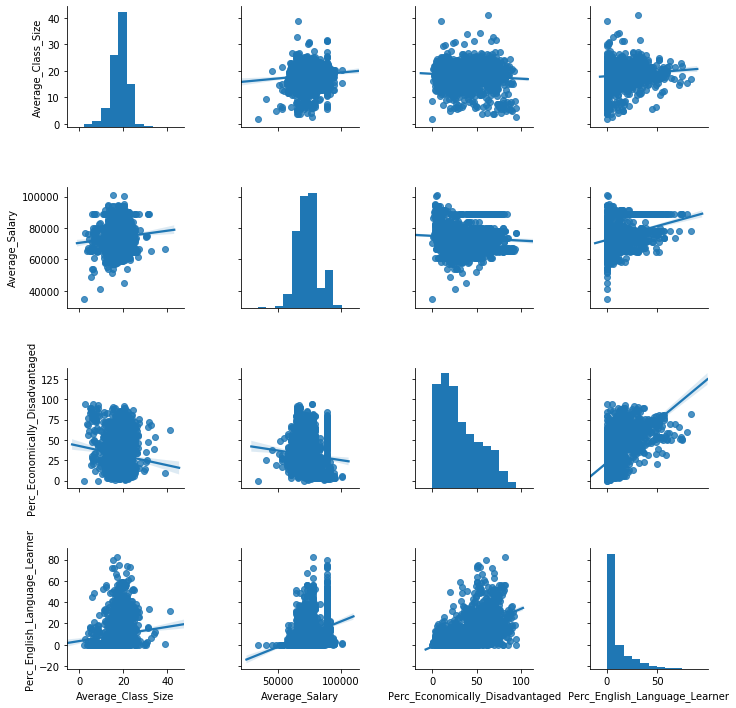

In [9]:
# Problem 3 code here (can split into multiple code chunks if you want)

sns.pairplot(df[['Average_Class_Size','Average_Salary','Perc_Economically_Disadvantaged', 'Perc_English_Language_Learner']], kind="reg")

In [ ]:
#The distribution of average class size and average salary looks relatively normal. 
#However, the distribution of the variables percent economically disadvantage and percent english language learner exhibits positive skew.
#Average class size appears to be positively related to average salary. 

In [6]:
#The variable average class size 
avgclasssize_avgsal = smf.ols(formula = 'Average_Class_Size ~ Average_Salary', data = df).fit()
avgclasssize_avgsal.summary()

#Overall the regression analysis indicates that average salary has a small positive effect on the average class size. 
#Average salary explains less than 1% of the variation in average class size. 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Class_Size   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     15.15
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           0.000103
Time:                        12:05:47   Log-Likelihood:                -4816.9
No. Observations:                1743   AIC:                             9638.
Df Residuals:                    1741   BIC:                             9649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.9223      0.855     17.461      0.000      13.246      16.598
Average_Salary  4.465e-05   1.15e-05      3.893      0.000    2.22e-05    6.71e-05
==============================================================================
Omnibus:                      185.777   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.137
Skew:                          -0.632   Prob(JB):                     2.16e-92
Kurtosis:                       5.053   Cond. No.                     6.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Problem 4

a) Create a new linear regression model that takes the model from 3c and adds both of the remaining variables from 3a as additional predictor variables, print the summary, and write a couple sentences interpreting the results, especially comparing it to Problem 3c.  

b) Add School_Type as another predictor to your model.  Interpret the new predictor in your output.  How is it different from the other predictors?

In [7]:
# Problem 4 code here (can split into multiple code chunks if you want)
model2 = smf.ols(formula = 'Average_Class_Size ~ Average_Salary + Perc_Economically_Disadvantaged + Perc_English_Language_Learner', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Class_Size   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     38.75
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           3.08e-24
Time:                        12:40:51   Log-Likelihood:                -4768.1
No. Observations:                1743   AIC:                             9544.
Df Residuals:                    1739   BIC:                             9566.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          19.6251      0.957     20.518      0.000      17.749      21.501
Average_Salary                  -7.414e-06   1.25e-05     -0.594      0.552   -3.19e-05    1.71e-05
Perc_Economically_Disadvantaged    -0.0518      0.005     -9.590      0.000      -0.062      -0.041
Perc_English_Language_Learner       0.0825      0.010      8.587      0.000       0.064       0.101
==============================================================================
Omnibus:                      104.914   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.181
Skew:                          -0.336   Prob(JB):                     1.17e-57
Kurtosis:                       4.777   Cond. No.                     7.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Compared to model 1 (3c), model 2 seems to be a better fit. 
#In this model, average salary is no longer a predictor of average class size. 
#The variable percent of economically disadvantaged is negatively related to average class size, whereas the variable percent english language learner is positively related to average class size. 
#Overall, this model explains about 6% of the variation in average class size. 

In [8]:
model3 = smf.ols(formula = 'Average_Class_Size ~ Average_Salary + Perc_Economically_Disadvantaged + Perc_English_Language_Learner + School_Type', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Class_Size   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     38.75
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           3.08e-24
Time:                        12:48:23   Log-Likelihood:                -4768.1
No. Observations:                1743   AIC:                             9544.
Df Residuals:                    1739   BIC:                             9566.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           9.8126      0.478     20.518      0.000       8.875      10.751
School_Type[T.Public School]        9.8126      0.478     20.518      0.000       8.875      10.751
Average_Salary                  -7.414e-06   1.25e-05     -0.594      0.552   -3.19e-05    1.71e-05
Perc_Economically_Disadvantaged    -0.0518      0.005     -9.590      0.000      -0.062      -0.041
Perc_English_Language_Learner       0.0825      0.010      8.587      0.000       0.064       0.101
==============================================================================
Omnibus:                      104.914   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.181
Skew:                          -0.336   Prob(JB):                     1.17e-57
Kurtosis:                       4.777   Cond. No.                     6.17e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.54e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#School type is different from the other variables in the model in that it is a dichotomous predictor. 
#Compared to private schools, public schools have a larger class size on average. 
#However, adding school type to the model does not change the model. 

#### Problem 5

a) Adapt your **pairplot** code from 3a to add the following argument:
`hue="School_Type"`

b) Describe what changes in the pairplots, and what it represents.

In [ ]:
# Problem 5 code here (can split into multiple code chunks if you want)

#### Problem 6

a) Save this Jupyter notebook as an HTML file (File > Download As > HTML) into your local repository (this folder).

b) Stage, commit, and push all changes to your GitHub repository.

c) Submit a link to your repository as your submission for the assignment on Canvas.